In [1]:
import numpy as np
import struct, math
from array import array
import matplotlib.pyplot as pyplot
%matplotlib inline

def load(file_img, file_label, N):
    with open(file_label, 'rb') as file:
        magic, size = struct.unpack(">II", file.read(8))
        labels = array("B", file.read())

    with open(file_img, 'rb') as file:
        magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
        image_data = array("B", file.read())
    images = []
    for i in range(N):
        images.append([0] * rows * cols)
    for i in range(N):
        images[i][:] = image_data[i * rows * cols:(i + 1) * rows * cols]
    images = np.array(images)
    images = np.insert(images, 0, np.ones(N),1)
    #print(images)
    #print(images.shape)
    labels = np.array(labels[:N])
    return images, labels
train_data, train_labels = load('train-images-idx3-ubyte', 'train-labels-idx1-ubyte', 20000)



In [2]:
# def softmax(a):
#     print(a)
#     top = np.exp(a)
#     bot = np.sum(np.exp(a),axis=1)
#     for i in range(top.shape[0]):
#         for j in range(top.shape[1]):
#             top[i][j] = top[i][j]/bot[j]
#     return top


def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm
def softmax_sto(z):
    z -= np.max(z)
    print(np.max(z))
    sm = (np.exp(z).T / np.sum(np.exp(z))).T
    return sm

def net(x,w):
    res = np.dot(x,w)
    return res
def one_hot(y):
    labels = np.zeros((20000, 10))
    for i in range(len(train_labels)):
        labels[i][int(train_labels[i])] = 1
    return  labels

def  getPred(p):
    return [np.argmax(row) for row in p]

def  getPred_sto(p):
    return np.argmax(p)

def gradient(x,y):
    return np.dot(x.T, y)

def get_error(pred,target):
    error = 0
    for p,t in zip(pred,target):
        if p != t:
            error +=1
    return float(error)/20000.0


def sigmoid_func(x):
    return 1 / (1 + math.exp(-x))

def sigmoid(z):
    f = np.vectorize(sigmoid_func)
    return f(z)

In [3]:
train_data, train_labels = load('train-images-idx3-ubyte', 'train-labels-idx1-ubyte', 20000)
test_data, test_labels = load('t10k-images-idx3-ubyte','t10k-labels-idx1-ubyte',7000)
labels = one_hot(train_labels)
w = np.zeros((785,10))

20000
(785, 10)


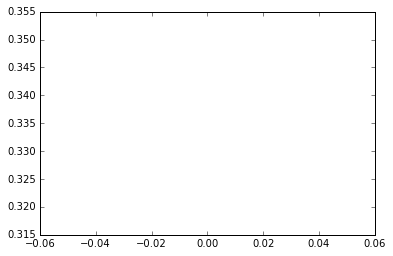

'\n\n#test\nnet_output = net(test_data, w)\nprobs = softmax(net_output)\npred = getPred(probs)\ner = get_error(pred, test_labels)\nprint(er)\n'

In [6]:
#print("weights" , w.shape)
#print("train_data", train_data.shape)
#print(train_labels.shape)
# for logistic 
alpha = 1e-20
# for softmax
# alpha = 1e-8
errors = []
rounds = 1

for t in range(rounds):
    net_output = net(train_data, w)
    #print(net_output[0])
    #print("net: ",net_output.shape)
    probs = sigmoid(net_output)

    #getting the error
    pred = getPred(probs)
    print(len(pred))
    er = get_error(pred,train_labels)
    errors.append(er)

    grad = (-1)*gradient(train_data,(labels-probs))
    print(grad.shape)
    w = w - (alpha* grad)

pyplot.plot(errors)
pyplot.show()
'''

#test
net_output = net(test_data, w)
probs = softmax(net_output)
pred = getPred(probs)
er = get_error(pred, test_labels)
print(er)
'''

In [14]:
#stochsitc
alpha = 1e-8
errors = []
train_shuffle = np.random.permutation(2)
for t in range(1):
    er = 0
    for n in train_shuffle:
        net_output = net(train_data[n,:], w)
        probs = softmax_sto(net_output)
'''
        pred = getPred_sto(probs)
        if pred != train_labels[n]:
            er += 1
        #errors.append(er)
        #print(len(train_data[n,:]))
        #print(w.shape)
        grad = (-1)*np.outer(train_data[n,:],(labels[n]-probs))
        w = w - (alpha* grad)
    errors.append(er/20000.00)
pyplot.plot(errors)
pyplot.xlabel('rounds')
pyplot.ylabel('error rate')
'''

0.0
0.0


"\n        pred = getPred_sto(probs)\n        if pred != train_labels[n]:\n            er += 1\n        #errors.append(er)\n        #print(len(train_data[n,:]))\n        #print(w.shape)\n        grad = (-1)*np.outer(train_data[n,:],(labels[n]-probs))\n        w = w - (alpha* grad)\n    errors.append(er/20000.00)\npyplot.plot(errors)\npyplot.xlabel('rounds')\npyplot.ylabel('error rate')\n"